In [49]:
import pandas as pd

In [50]:

df_lsl = pd.read_csv('./lsl_results.csv')
df_lsl['timestamp'] = df_lsl['timestamp'] + df_lsl['offset']
df_lsl.drop(columns=['offset'], inplace=True)
df_lsl['timestamp'] = df_lsl['timestamp'] * 1000
df_lsl['timestamp']
print(df_lsl.shape)
df_lsl.head()

(1000, 2)


,timestamp,value
0,1.705183e+07,A
1,1.705194e+07,a
2,1.705209e+07,A
3,1.705219e+07,a
4,1.705234e+07,A


In [51]:
df_sensor = pd.read_csv('./sensor_results.csv')
df_sensor = df_sensor[df_sensor['value'].str.lower() == 'a']
print(df_sensor.shape)
df_sensor.head()


(1004, 2)


,timestamp,value
0,17052.319621,a
1,17052.365496,A
2,17052.373834,a
3,17052.382173,A
4,17052.391458,a


In [20]:
df_lsl.tail()

,timestamp,value
995,16532.351628,A
996,16532.452346,a
997,16532.603016,A
998,16532.703677,a
999,16532.854288,A


In [21]:
df_sensor.tail()

,timestamp,value
998,16532.233771,a
999,16532.377463,A
1000,16532.479268,a
1001,16532.640696,A
1002,16532.734796,a


In [27]:
df['latency'] = df['timestamp'].diff()

In [28]:
df['latency'].mean()

np.float64(0.12265017439613471)

<Axes: >

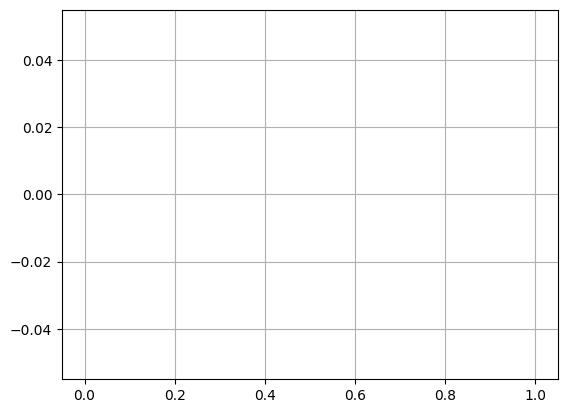

In [6]:
df['latency'].hist(bins=100)

In [7]:
import pylsl

sequence_stream = pylsl.resolve_byprop('name', 'SequenceStream', timeout=0.0)[0]
sequence_stream = pylsl.StreamInlet(sequence_stream)

sequence_stream.pull_sample(timeout=0.0)

(None, None)

In [8]:
sequence_stream.pull_sample(timeout=0.0)

([1, 1, 1, 1, 1, 1, 1, 1], 13091.1935125)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyxdf

In [12]:
fpath = '.\sub-P001_ses-S001_task-vsyncsensor_test_run-001_eeg.xdf'
streams, header = pyxdf.load_xdf(fpath)

for stream in streams:
    print(stream['info']['name'])

['SequenceStream']
['ScreenSensorStream']


In [13]:
sequence_stream = streams[0]
sensor_stream = streams[1]

## Sequence jitter

In [14]:
timestamps = sequence_stream['time_stamps']
timestamps_diff = np.diff(timestamps)

In [15]:
timestamps_diff

array([0.1007089, 0.1506352, 0.100699 , 0.1506284, 0.1007213, 0.1505956,
       0.1007234, 0.1505805, 0.1007488, 0.1505779, 0.1007344, 0.1506269,
       0.1007255, 0.1505733, 0.100727 , 0.1505977, 0.1007308, 0.1505979,
       0.1007227, 0.1506107, 0.1007563, 0.1505913, 0.1006907, 0.150616 ,
       0.1007698, 0.1505584, 0.1007819, 0.1505379, 0.1007673, 0.1505612,
       0.1007423, 0.150585 , 0.1007282, 0.1506223, 0.1007134, 0.1505859,
       0.1007443, 0.1506513, 0.1007239])

In [17]:
on_timestamps_diff = timestamps_diff[timestamps_diff < 0.13] - 0.1
off_timestamps_diff = timestamps_diff[timestamps_diff > 0.13] - 0.15
delays = np.concatenate((on_timestamps_diff, off_timestamps_diff))
print(delays.shape)

(39,)


<Axes: ylabel='Count'>

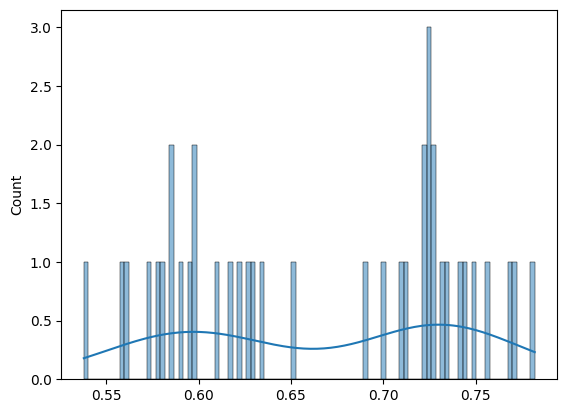

In [19]:
sns.histplot(delays * 1000, bins=100, kde=True)

# Sensor jitter

In [21]:
timestamps = sensor_stream['time_stamps']
timeseries = sensor_stream['time_series']
timestamps_diff = np.diff(timestamps)

In [22]:
timestamps_diff

array([0.1024438, 0.1446112, 0.1020727, 0.1542286, 0.0947326, 0.1541309,
       0.1024825, 0.150996 , 0.1027049, 0.1462302, 0.1028731, 0.1464967,
       0.1040498, 0.145609 , 0.1017275, 0.1532474, 0.1021269, 0.1455427,
       0.1047923, 0.1528541, 0.0936127, 0.155043 , 0.1047629, 0.1455721,
       0.1020648, 0.1476372, 0.1016993, 0.1546331, 0.102681 , 0.1447797,
       0.1016343, 0.1544694, 0.0943879, 0.1540047, 0.1013802, 0.152945 ,
       0.0939205, 0.1513961, 0.101736 ])

<Axes: ylabel='Count'>

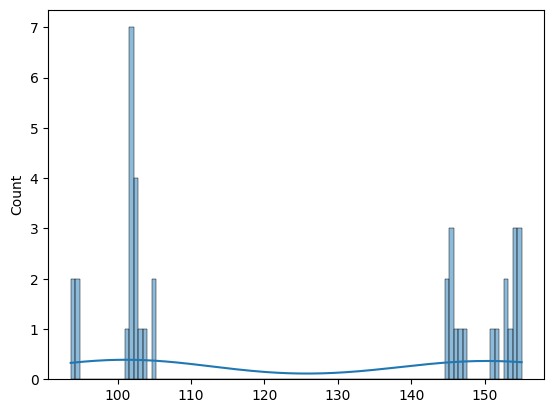

In [23]:
sns.histplot(timestamps_diff * 1000, bins=100, kde=True)